# Capstone Project - The Battle of Neighborhoods (Week 2)

# Business Problem Section

#### Background

As per the survey conducted it has been noticed that fire safety for many of the nursing providers has been of concern. There is a concern on how to move with the solution.The annual number of fires in health care properties reported to United States fire departments has followed a moderate downward trend since 2003. After falling between 2003 and 2010, the estimated number of fires has increased each year since 2011

#### Business Problem

There is an urgent need of machine learning algorithm to assist the professionals and nursing home providers to make an effective decisions to tackle all fire safety deficiencies.

To solve this problem I would cluster the zone based on following:-
severity level
region wise
Tag version
Deficieny Description

# Data Section

Data was collected from https://healthdata.gov/dataset/fire-safety-deficiencies

We would be using following data.A list of all fire safety deficiencies currently listed on Nursing Home Compare, including the nursing home that received the deficiency, the associated inspection date, deficiency tag number, scope and severity, the current status of the deficiency and the correction date.

'Federal Provider Number',
'Provider Name', 
'Provider Address',
'Provider City',
'Provider State',
'Provider Zip Code', 
'Survey Date',
'Survey Type', 
'Deficiency Prefix', 
'Deficiency Tag Number',
'Tag Version', 
'Deficiency Description',
'Scope Severity Code',
'Deficiency Corrected',
'Correction Date', 
'Inspection Cycle',
'Standard Deficiency', 
'Complaint Deficiency',
'Location',
'Processing Date'

To explore and create a zone based on different cluster.We will access data through FourSquare API interface and arrange them as a dataframe for visualization. We will recommend better option for fire safety.

# Methodology section

importing library, collecting data, cleaning data , normalizing it. Data modeling, preprocessing, modeling and clustering.

In [55]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import folium
import foursquare
import sklearn
import geopy
from geopy.geocoders import Nominatim
from geopy.distance import vincenty
# import k-means from clustering stage
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
#from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsClassifier

In [56]:
dfFireSafety=pd.read_csv("C:\\Fire_Safety_Deficiencies.csv")
dfFireSafety.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Tag Number,Tag Version,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Location,Processing Date
0,215224,MANORCARE HEALTH SERVICES -SILVER SPRING,2501 MUSGROVE ROAD,SILVER SPRING,MD,20904,10/23/2017,Fire Safety,K,100,1,Meet other general requirements.,3,"Deficient, Provider has date of correction",11/30/2017,2,True,0,"2501 MUSGROVE ROAD SILVER SPRING, MD 20904 (39...",6/1/2019
1,215226,POWERBACK REHABILITATION,515 BRIGHTFIELD ROAD,LUTHERVILLE,MD,21093,1/15/2016,Fire Safety,K,51,2,A fire alarm system that can be heard througho...,5,"Deficient, Provider has date of correction",3/22/2016,3,True,0,"515 BRIGHTFIELD ROAD LUTHERVILLE, MD 21093 (39...",6/1/2019
2,215240,MORAN NURSING AND REHABILITATION CENTER,25701 SHADY LANE S. W.,WESTERNPORT,MD,21562,5/23/2018,Fire Safety,K,321,1,Ensure that special areas are constructed so t...,3,"Deficient, Provider has date of correction",6/23/2018,1,True,0,"25701 SHADY LANE S W WESTERNPORT, MD 21562 (39...",6/1/2019
3,215178,FREDERICK VILLA NURSING & REHAB CENTER,711 ACADEMY ROAD,CATONSVILLE,MD,21228,2/26/2018,Fire Safety,K,353,1,"Inspect, test, and maintain automatic sprinkle...",5,"Deficient, Provider has date of correction",4/6/2018,1,True,0,"711 ACADEMY ROAD CATONSVILLE, MD 21228 (39.286...",6/1/2019
4,215207,"LOCHEARN NURSING HOME, LLC",4800 SETON DRIVE,BALTIMORE,MD,21215,8/24/2015,Fire Safety,K,71,2,Properly constructed linen or trash chutes.,3,"Deficient, Provider has date of correction",10/8/2015,3,True,0,"4800 SETON DRIVE BALTIMORE, MD 21215 (39.34343...",6/1/2019


In [57]:
dfFireSafety.shape

(154258, 20)

Sorting data based on severity

In [58]:
dfFireSafety.sort_values(by=['Scope Severity Code'],ascending=[False],inplace=True)

In [59]:
dfFireSafety.head(10)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Tag Number,Tag Version,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Location,Processing Date
124944,155494,"WATERS OF SCOTTSBURG, THE",1350 N TODD DR,SCOTTSBURG,IN,47170,3/29/2017,Fire Safety,K,353,1,"Inspect, test, and maintain automatic sprinkle...",10,"Deficient, Provider has date of correction",4/17/2017,3,True,0,"1350 N TODD DR SCOTTSBURG, IN 47170 (38.70198,...",6/1/2019
13703,265410,BENTONVIEW PARK HEALTH & REHABILITATION,410 WEST BENTON STREET,MONETT,MO,65708,3/28/2017,Fire Safety,K,354,1,Follow proper procedures when the automatic sp...,10,"Deficient, Provider has date of correction",4/1/2017,3,False,1,"410 WEST BENTON STREET MONETT, MO 65708 (36.92...",6/1/2019
60519,495334,SHORE HEALTH & REHAB CENTER,26181 PARKSLEY ROAD,PARKSLEY,VA,23421,1/30/2019,Fire Safety,K,341,1,Install a fire alarm system that can be heard ...,10,"Deficient, Provider has date of correction",4/3/2019,1,True,0,"26181 PARKSLEY ROAD PARKSLEY, VA 23421 (37.758...",6/1/2019
99578,75353,JEWISH SENIOR SERVICES,4200 PARK AVENUE,BRIDGEPORT,CT,6604,8/2/2016,Fire Safety,K,50,1,Record of quarterly fire drills for each shift...,10,"Deficient, Provider has date of correction",8/5/2016,3,True,0,"4200 PARK AVENUE BRIDGEPORT, CT 06604 (41.2120...",6/1/2019
139558,195499,ST FRANCES NSG & REHAB CENTER,417 INDUSTRIAL DRIVE,OBERLIN,LA,70655,1/9/2017,Fire Safety,K,343,1,Have a fire alarm with audible and visual sign...,10,"Deficient, Provider has date of correction",2/3/2017,3,True,0,"417 INDUSTRIAL DRIVE OBERLIN, LA 70655 (30.626...",6/1/2019
4030,45288,ALLAY HEALTH AND REHAB,3115 BOWMAN ROAD,LITTLE ROCK,AR,72211,9/19/2018,Fire Safety,K,346,1,Follow proper procedures when the fire alarm w...,10,"Deficient, Provider has date of correction",10/18/2018,1,True,0,"3115 BOWMAN ROAD LITTLE ROCK, AR 72211",6/1/2019
140376,205090,BORDERVIEW REHAB & LIVING CTR,208 STATE STREET,VAN BUREN,ME,4785,6/28/2016,Fire Safety,K,62,2,Automatic sprinkler systems that have been mai...,10,"Deficient, Provider has date of correction",11/10/2016,3,True,0,"208 STATE STREET VAN BUREN, ME 04785 (47.14831...",6/1/2019
87679,675615,MERIDIAN CARE AT GRAYSON SQUARE,815 E GRAYSON ST,SAN ANTONIO,TX,78208,12/12/2018,Fire Safety,K,918,1,Have generator or other power source capable o...,10,"Deficient, Provider has date of correction",12/13/2018,1,True,0,"815 E GRAYSON ST SAN ANTONIO, TX 78208 (29.443...",6/1/2019
13001,265383,FOUNTAINBLEAU LODGE,2001 NORTH KINGSHIGHWAY,CAPE GIRARDEAU,MO,63701,10/4/2016,Fire Safety,K,155,1,An approved back-up procedure for a faulty fir...,10,"Deficient, Provider has date of correction",11/1/2016,3,True,0,"2001 NORTH KINGSHIGHWAY CAPE GIRARDEAU, MO 637...",6/1/2019
100645,75425,VANDERMAN PLACE,595 VALLEY STREET,WILLIMANTIC,CT,6226,1/2/2018,Fire Safety,K,351,1,Install an approved automatic sprinkler system.,10,"Deficient, Provider has plan of correction",1/5/2018,2,False,1,"595 VALLEY STREET WILLIMANTIC, CT 06226 (41.71...",6/1/2019


### K-Means Clustering

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
dfFireSafetyK=dfFireSafety[['Scope Severity Code','Complaint Deficiency','Inspection Cycle']]

In [62]:
X = dfFireSafetyK.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

c:\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.0612209 ,  1.31154847],
       [16.33428994,  1.31154847],
       [-0.0612209 , -1.1337079 ],
       ...,
       [-0.0612209 ,  1.31154847],
       [-0.0612209 , -1.1337079 ],
       [-0.0612209 ,  0.08892029]])

In [63]:
num_clusters = 9

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(dfFireSafetyK)
#labels = k_means.labels_
labels=k_means.labels_
#pred

In [64]:
centroids = k_means.cluster_centers_
centroids

array([[5.01482702e+00, 7.66062603e-03, 3.00000000e+00],
       [3.00000000e+00, 3.21913997e-03, 1.49113743e+00],
       [2.79013635e+00, 2.49492312e-03, 3.00000000e+00],
       [5.01031339e+00, 6.18803646e-03, 2.00000000e+00],
       [1.94769286e+00, 3.53103118e-03, 1.40110120e+00],
       [4.00000000e+00, 2.93754774e-03, 3.00000000e+00],
       [4.00000000e+00, 3.15633123e-03, 2.00000000e+00],
       [5.00695145e+00, 2.75935261e-03, 1.00000000e+00],
       [4.00000000e+00, 3.38367066e-03, 1.00000000e+00]])

In [65]:
dfFireSafety['Labels']=labels
dfFireSafety.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Tag Number,...,Deficiency Description,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Location,Processing Date,Labels
124944,155494,"WATERS OF SCOTTSBURG, THE",1350 N TODD DR,SCOTTSBURG,IN,47170,3/29/2017,Fire Safety,K,353,...,"Inspect, test, and maintain automatic sprinkle...",10,"Deficient, Provider has date of correction",4/17/2017,3,True,0,"1350 N TODD DR SCOTTSBURG, IN 47170 (38.70198,...",6/1/2019,0
13703,265410,BENTONVIEW PARK HEALTH & REHABILITATION,410 WEST BENTON STREET,MONETT,MO,65708,3/28/2017,Fire Safety,K,354,...,Follow proper procedures when the automatic sp...,10,"Deficient, Provider has date of correction",4/1/2017,3,False,1,"410 WEST BENTON STREET MONETT, MO 65708 (36.92...",6/1/2019,0
60519,495334,SHORE HEALTH & REHAB CENTER,26181 PARKSLEY ROAD,PARKSLEY,VA,23421,1/30/2019,Fire Safety,K,341,...,Install a fire alarm system that can be heard ...,10,"Deficient, Provider has date of correction",4/3/2019,1,True,0,"26181 PARKSLEY ROAD PARKSLEY, VA 23421 (37.758...",6/1/2019,7
99578,75353,JEWISH SENIOR SERVICES,4200 PARK AVENUE,BRIDGEPORT,CT,6604,8/2/2016,Fire Safety,K,50,...,Record of quarterly fire drills for each shift...,10,"Deficient, Provider has date of correction",8/5/2016,3,True,0,"4200 PARK AVENUE BRIDGEPORT, CT 06604 (41.2120...",6/1/2019,0
139558,195499,ST FRANCES NSG & REHAB CENTER,417 INDUSTRIAL DRIVE,OBERLIN,LA,70655,1/9/2017,Fire Safety,K,343,...,Have a fire alarm with audible and visual sign...,10,"Deficient, Provider has date of correction",2/3/2017,3,True,0,"417 INDUSTRIAL DRIVE OBERLIN, LA 70655 (30.626...",6/1/2019,0


In [66]:
dfFireSafetyC=dfFireSafety[['Scope Severity Code','Labels']]
dfFireSafetyC['Labels']=dfFireSafetyC['Labels'].astype('float')
dfFireSafetyC.head()

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Scope Severity Code,Labels
124944,10,0.0
13703,10,0.0
60519,10,7.0
99578,10,0.0
139558,10,0.0


In [67]:
dfFireSafetyC.groupby('Labels').mean()

,Scope Severity Code
Labels,
0.0,5.014827
1.0,3.000000
2.0,2.790136
3.0,5.010313
4.0,1.947693
5.0,4.000000
6.0,4.000000
7.0,5.006951
8.0,4.000000


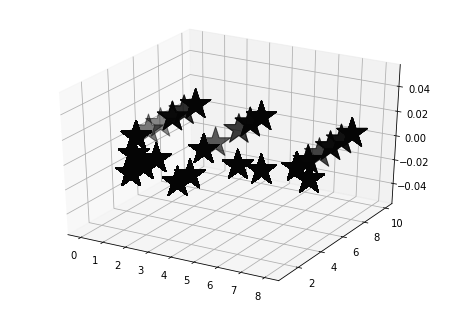

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(dfFireSafetyC['Labels'], dfFireSafetyC['Scope Severity Code'], marker='*', c='#050505', s=1000)

In [69]:
dfFireSafetyStateWise=dfFireSafety[['Provider State','Labels']]

In [70]:
dfFireSafetymean=dfFireSafetyStateWise.groupby('Labels')['Provider State'].nunique()

dfFireSafetymean.head()

Labels
0    49
1    51
2    51
3    49
4    48
Name: Provider State, dtype: int64

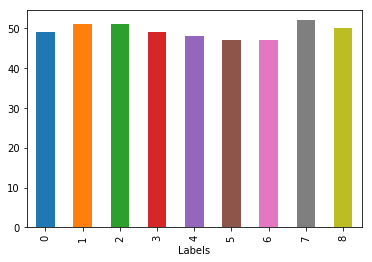

In [71]:
dfFireSafetymean.plot(kind='bar')


In [79]:
CLIENT_ID = 'IDSENOB1J5TED3WWYTJPWXHMKRMF2EA3MBKEEYWFGNAF1SEG' # your Foursquare ID
CLIENT_SECRET = 'KQZM4R3IOYU5VI25HPKJMFE20VRVCQGQ24ZNR4B2Y4N4QXKT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: IDSENOB1J5TED3WWYTJPWXHMKRMF2EA3MBKEEYWFGNAF1SEG
CLIENT_SECRET:KQZM4R3IOYU5VI25HPKJMFE20VRVCQGQ24ZNR4B2Y4N4QXKT


### FourSquare API

In [92]:
address = '4800 SETON DRIVE,BALTIMORE,MD'


geolocator = Nominatim(user_agent="foursquare_agent")
#geolocator
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


39.34410255 -76.7085207705438


In [94]:
search_query = 'REHABILITATION CENTER'
radius = 500

In [95]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IDSENOB1J5TED3WWYTJPWXHMKRMF2EA3MBKEEYWFGNAF1SEG&client_secret=KQZM4R3IOYU5VI25HPKJMFE20VRVCQGQ24ZNR4B2Y4N4QXKT&ll=39.34410255,-76.7085207705438&v=20180604&query=REHABILITATION CENTER&radius=500&limit=30'

In [96]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5d371bd0a1979300374177fe'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/conventioncenter_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1ff931735',
      'name': 'Convention Center',
      'pluralName': 'Convention Centers',
      'primary': True,
      'shortName': 'Convention Center'}],
    'hasPerk': False,
    'id': '57d0e244cd10ec59d8f5429f',
    'location': {'address': '6020 Marian Dr',
     'cc': 'US',
     'city': 'Baltimore',
     'country': 'United States',
     'distance': 316,
     'formattedAddress': ['6020 Marian Dr',
      'Baltimore, MD 21215',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.346109,
       'lng': -76.711121}],
     'lat': 39.346109,
     'lng': -76.711121,
     'postalCode': '21215',
     'state': 'MD'},
    'name': 'New Psalmist Retreat & Meeting Center',
    'referralId': 'v-1563892688'}]}}

In [97]:
venues = results['response']['venues']

# tranform venues into a dataframe
dfVenue = json_normalize(venues)
dfVenue.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ff931735', 'name': 'C...",False,57d0e244cd10ec59d8f5429f,6020 Marian Dr,US,Baltimore,United States,316,"[6020 Marian Dr, Baltimore, MD 21215, United S...","[{'label': 'display', 'lat': 39.346109, 'lng':...",39.346109,-76.711121,21215,MD,New Psalmist Retreat & Meeting Center,v-1563892688


In [100]:
filtered_columns = ['name', 'categories'] + [col for col in dfVenue.columns if col.startswith('location.')] + ['id']
dfVenue_filtered = dfVenue.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dfVenue_filtered['categories'] = dfVenue_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dfVenue_filtered.columns = [column.split('.')[-1] for column in dfVenue_filtered.columns]

dfVenue_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,New Psalmist Retreat & Meeting Center,Convention Center,6020 Marian Dr,US,Baltimore,United States,316,"[6020 Marian Dr, Baltimore, MD 21215, United S...","[{'label': 'display', 'lat': 39.346109, 'lng':...",39.346109,-76.711121,21215,MD,57d0e244cd10ec59d8f5429f


In [101]:
dfVenue_filtered.name

0    New Psalmist Retreat & Meeting Center
Name: name, dtype: object

In [102]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

In [104]:
for lat, lng, label in zip(dfVenue_filtered.lat, dfVenue_filtered.lng, dfVenue_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Logistic Regression

In [112]:
X=dfFireSafety[['Scope Severity Code']].values
Y=dfFireSafety['Complaint Deficiency'].values

In [113]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X.astype(str),Y.astype(str))
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [115]:
yprediction = LR.predict(X)
yprediction

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U21')

In [117]:
yhat_prob = LR.predict_proba(X)
yhat_prob

array([[9.99958355e-01, 4.16454238e-05],
       [9.99958355e-01, 4.16454238e-05],
       [9.99958355e-01, 4.16454238e-05],
       ...,
       [9.69241688e-01, 3.07583116e-02],
       [9.69241688e-01, 3.07583116e-02],
       [9.69241688e-01, 3.07583116e-02]])

In [118]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(Y.astype(str), yprediction)

0.9962659959288983

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import itertools
print (classification_report(Y.astype(str), yprediction))

c:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    153682
           1       0.00      0.00      0.00       576

   micro avg       1.00      1.00      1.00    154258
   macro avg       0.50      0.50      0.50    154258
weighted avg       0.99      1.00      0.99    154258



In [124]:
dfFireSafety.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Survey Date,Survey Type,Deficiency Prefix,Deficiency Tag Number,...,Scope Severity Code,Deficiency Corrected,Correction Date,Inspection Cycle,Standard Deficiency,Complaint Deficiency,Location,Processing Date,Labels,PredictedComplaintDeficiency
124944,155494,"WATERS OF SCOTTSBURG, THE",1350 N TODD DR,SCOTTSBURG,IN,47170,3/29/2017,Fire Safety,K,353,...,10,"Deficient, Provider has date of correction",4/17/2017,3,True,0,"1350 N TODD DR SCOTTSBURG, IN 47170 (38.70198,...",6/1/2019,0,0
13703,265410,BENTONVIEW PARK HEALTH & REHABILITATION,410 WEST BENTON STREET,MONETT,MO,65708,3/28/2017,Fire Safety,K,354,...,10,"Deficient, Provider has date of correction",4/1/2017,3,False,1,"410 WEST BENTON STREET MONETT, MO 65708 (36.92...",6/1/2019,0,0
60519,495334,SHORE HEALTH & REHAB CENTER,26181 PARKSLEY ROAD,PARKSLEY,VA,23421,1/30/2019,Fire Safety,K,341,...,10,"Deficient, Provider has date of correction",4/3/2019,1,True,0,"26181 PARKSLEY ROAD PARKSLEY, VA 23421 (37.758...",6/1/2019,7,0
99578,75353,JEWISH SENIOR SERVICES,4200 PARK AVENUE,BRIDGEPORT,CT,6604,8/2/2016,Fire Safety,K,50,...,10,"Deficient, Provider has date of correction",8/5/2016,3,True,0,"4200 PARK AVENUE BRIDGEPORT, CT 06604 (41.2120...",6/1/2019,0,0
139558,195499,ST FRANCES NSG & REHAB CENTER,417 INDUSTRIAL DRIVE,OBERLIN,LA,70655,1/9/2017,Fire Safety,K,343,...,10,"Deficient, Provider has date of correction",2/3/2017,3,True,0,"417 INDUSTRIAL DRIVE OBERLIN, LA 70655 (30.626...",6/1/2019,0,0


## Results and Discussion section

We may discuss the result as we see severity level 7 is occuring many of the states. We should concentrate on that first. 
Based on cluster we can apply different safety mechanism

### Conclusion

To solve the problem, We should cluster different fire deficiency zone and action accordingly. We also did Mapping to show the area. 
We used Logistic to know the probability of complaint deficiency